In [1]:
import pandas as pd

In [3]:
# 공식 문서
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows 

In [11]:
df = pd.DataFrame(
{"a" : [4, 5, 6, 4],
"b" : [7, 8, 9, 9],
"c" : [10, 11, 12, 10]},
index = [1, 2, 3, 4])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,10


In [5]:
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [6]:
df[["a"]]

,a
1,4
2,5
3,6


In [9]:
df[df["a"] > 4]

,a,b,c
2,5,8,11
3,6,9,12


In [10]:
df[["a", "b"]]

,a,b
1,4,7
2,5,8
3,6,9


In [12]:
df["a"].value_counts()

a
4    2
5    1
6    1
Name: count, dtype: int64

In [13]:
len(df)

4

In [16]:
df["a"].sort_values()
df.sort_values("a", ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
4,4,9,10


In [ ]:
df = df.drop(["c"], axis=1)
df

In [25]:
df.groupby(["a"])["b"].agg(["mean", "sum", "count"])

,mean,sum,count
a,,,
4,8.0,16,2
5,8.0,8,1
6,9.0,9,1


In [26]:
df.groupby(["a"])["b"].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,8.0,1.414214,7.0,7.5,8.0,8.5,9.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [28]:
pd.pivot_table(df, index="a", values="b", aggfunc="sum")

,b
a,
4,16
5,8
6,9


<Axes: ylabel='Density'>

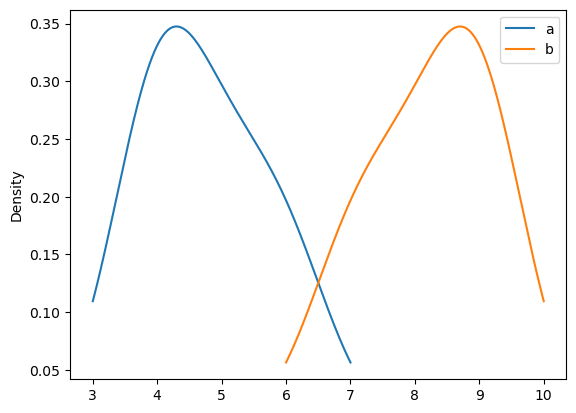

In [34]:
df.plot.density()